# Calkit Board Evaluation

Chapman University (2024)

In [8]:
import skrf as rf
import matplotlib.pylab as pl
import numpy
rootdir = '/Users/fsl/Documents/GitHub/tylew/archive/2024/398rf/'
# Based on two port measurements
s2p = [rf.Network()]*6
s2p[0] = rf.Network(rootdir + 'Benson_OpenShort.s2p') #open S11, Short S22
s2p[2] = rf.Network(rootdir + 'Benson_Loads.s2p') #load1 S11, load2 S22
s2p[4] = rf.Network(rootdir + 'Chapman_Thru.s2p')
s2p[1] = rf.Network(rootdir + 'or_OpenShort.s2p') #open S11, Short S22
s2p[3] = rf.Network(rootdir + 'or_Loads.s2p') #load1 S11, load2 S22
s2p[5] = rf.Network(rootdir + 'or_Thru.s2p')


pinet = [rf.Network()]*4
pinet[0] = rf.Network(rootdir + 'Benson_Pi.s2p')
pinet[2] = rf.Network(rootdir + 'Benson_T.s2p')
pinet[1] = rf.Network(rootdir + 'Chapman_Pi.s2p')
pinet[3] = rf.Network(rootdir + 'Chapman_T.s2p')


## Load Evaluation 

The following plots are comparing two boards named _Chapman_ (left plots) and _or_ (right plots). 

In this section the two loads from each board are measured at the same time. S11 shows the reflection of the left load (blue color) and S22 the reflection of the right load (orange color). S21 and S12 are also measured, but ideally its value should be zero over frequency (or minus infinity in dB), as no signal should be transmitted from port one to port two. 

Ideally, the input impedance of a 50ohms line terminated with 50ohms should be equal to
 
$ Z_{in}\approx 50\Omega$, 

and the S11 or reflection coeffiecient as 

$ S_{11}=\frac{Z_{in}-Z_0}{Z_{in}+Z_0}\approx 0$, or $S_{11}$ (dB) ~ - $\infty$

However, many aspects contribute to be far from the ideal case: 

1. Resistors: 
- Not perfect 50$\Omega$ resistors, maybe 50.1 or 49.1 
- Soldering of the resistors = imperfections, too much/little soldering contributing to added losses. 
2. Planar transmission line
- not perfect 50ohm line. Planar line is defined by the width of the signal path and its gap to the ground plane (vertical, inside the board). small fabrication imperfection or manufaturer tolerance can  contribute to be far from a perfect 50ohm line. 
- losses: (1) conductor losses (signal path) and dielectric losses (dielectric between signal and ground plane). Losses sometimes define the frequency limitation of the transmission line. 
3. Connectors
- transition between connectors from a coaxial cable to a planar structure. The E/H fields distribution changes from type of line to another, generating losses and parasitics that breaks the 50\ohm ideality. 

### Load Plots 


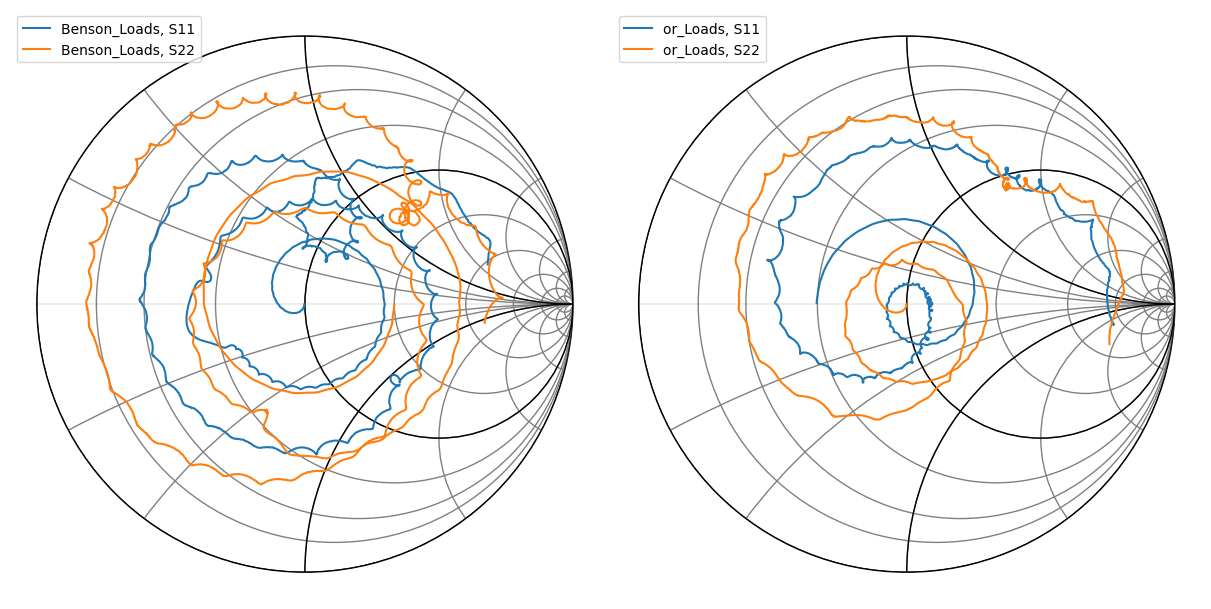

In [3]:
_, ax = pl.subplots(1,2, figsize=(12, 6), layout = 'constrained')
for ind,i in enumerate([2,3]):
    for j in range(0,2):
        # smith chart
        s2p[i].plot_s_smith(m=j,n=j, ax =ax[ind])

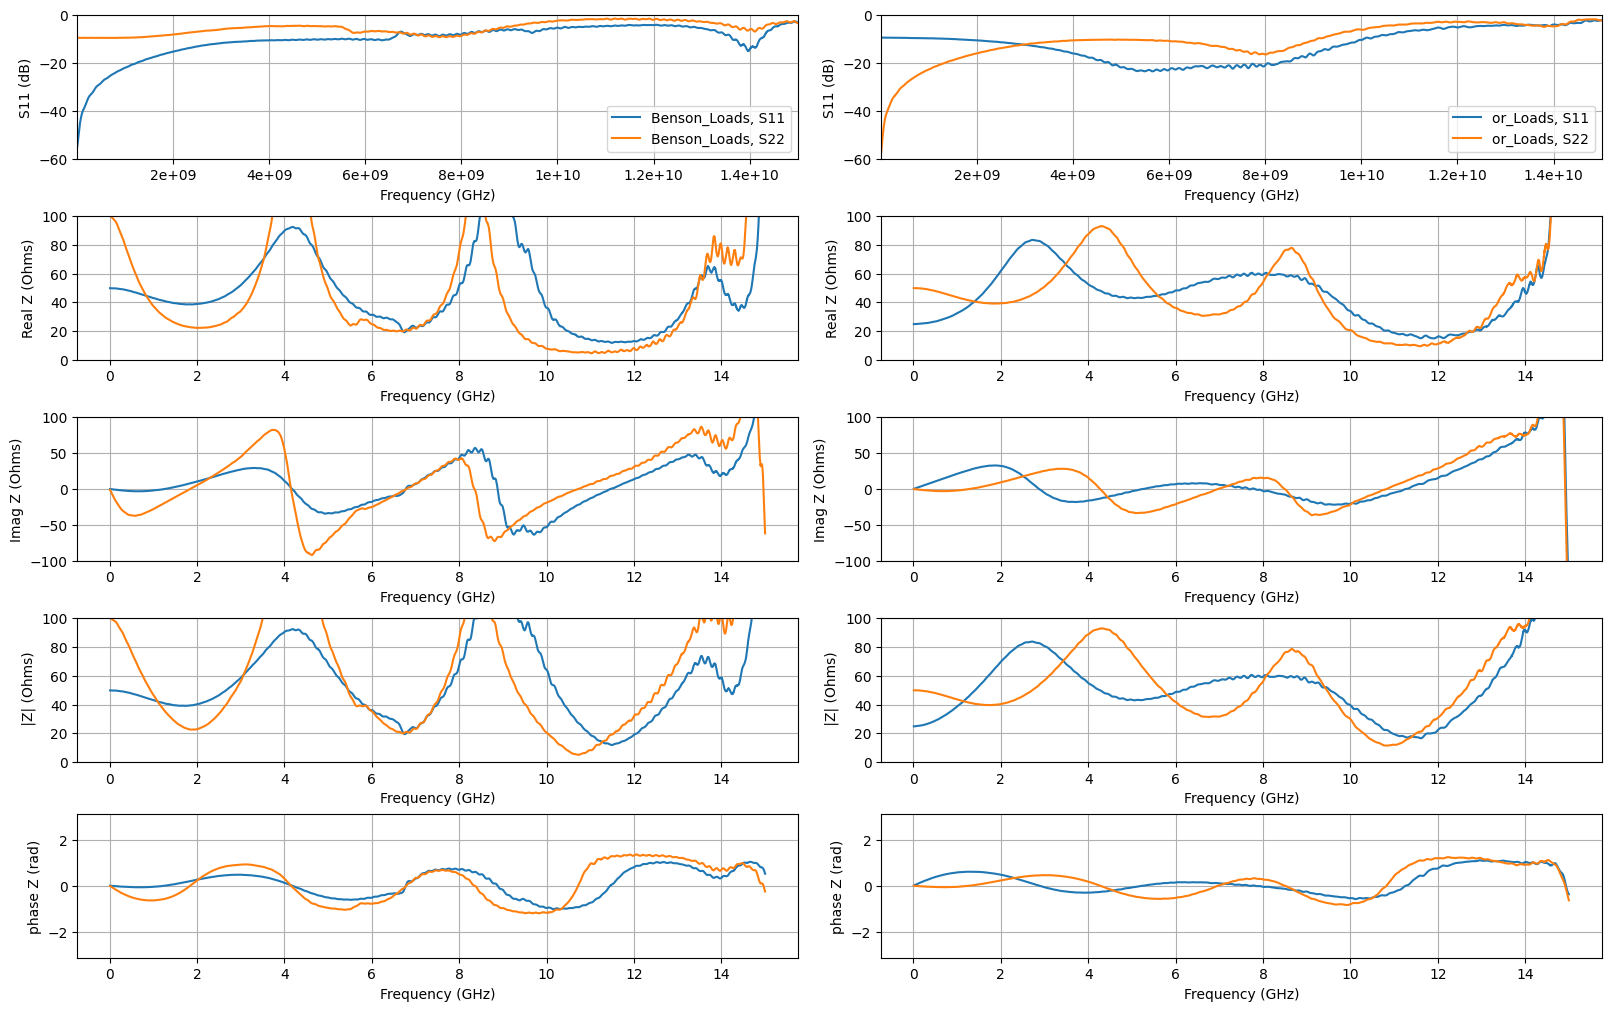

In [4]:
_, ax = pl.subplots(5,2, figsize=(16, 10), layout = 'constrained')
for ind,i in enumerate([2,3]):
    for j in range(0,2):
        # # # magnitude reflection coeffient
        s2p[i].plot_s_db(m=j,n=j, ax =ax[0,ind])
        ax[0,ind].grid(True)
        ax[0,ind].set_ylim((-60,0))
        ax[0,ind].set_ylabel('S11 (dB)')
        ax[0,ind].set_xlabel('Frequency (GHz)')
        # # # Real(Z)
        ax[1,ind].plot(s2p[i].f/1e9,numpy.real(s2p[i].z[:,j,j]))
        ax[1,ind].grid(True)
        ax[1,ind].set_ylim((0,100))
        ax[1,ind].set_ylabel('Real Z (Ohms)')
        ax[1,ind].set_xlabel('Frequency (GHz)')
        # # Imag(Z)
        ax[2,ind].plot(s2p[i].f/1e9,numpy.imag(s2p[i].z[:,j,j]))
        ax[2,ind].grid(True)
        ax[2,ind].set_ylim((-100,100))
        ax[2,ind].set_ylabel('Imag Z (Ohms)')
        ax[2,ind].set_xlabel('Frequency (GHz)')
        #
        ax[3,ind].plot(s2p[i].f/1e9,abs(s2p[i].z[:,j,j]))
        ax[3,ind].grid(True)
        ax[3,ind].set_ylim((0,100))
        ax[3,ind].set_ylabel(' |Z| (Ohms)')
        ax[3,ind].set_xlabel('Frequency (GHz)')
        # #
        ax[4,ind].plot(s2p[i].f/1e9,numpy.angle(s2p[i].z[:,j,j]))
        ax[4,ind].grid(True)
        ax[4,ind].set_ylim((-3.14,3.14))
        ax[4,ind].set_ylabel('phase Z (rad)')
        ax[4,ind].set_xlabel('Frequency (GHz)')

## Open Evaluation

The input impedance of a lossless line with the other end open is: 

$Z_{in} = -j Z_0 \cot(\beta L)$

## Short Evaluation

The input impedance of a lossless line with the other end short is 

$Z_{in} = jZ_0 \tan(\beta L)$

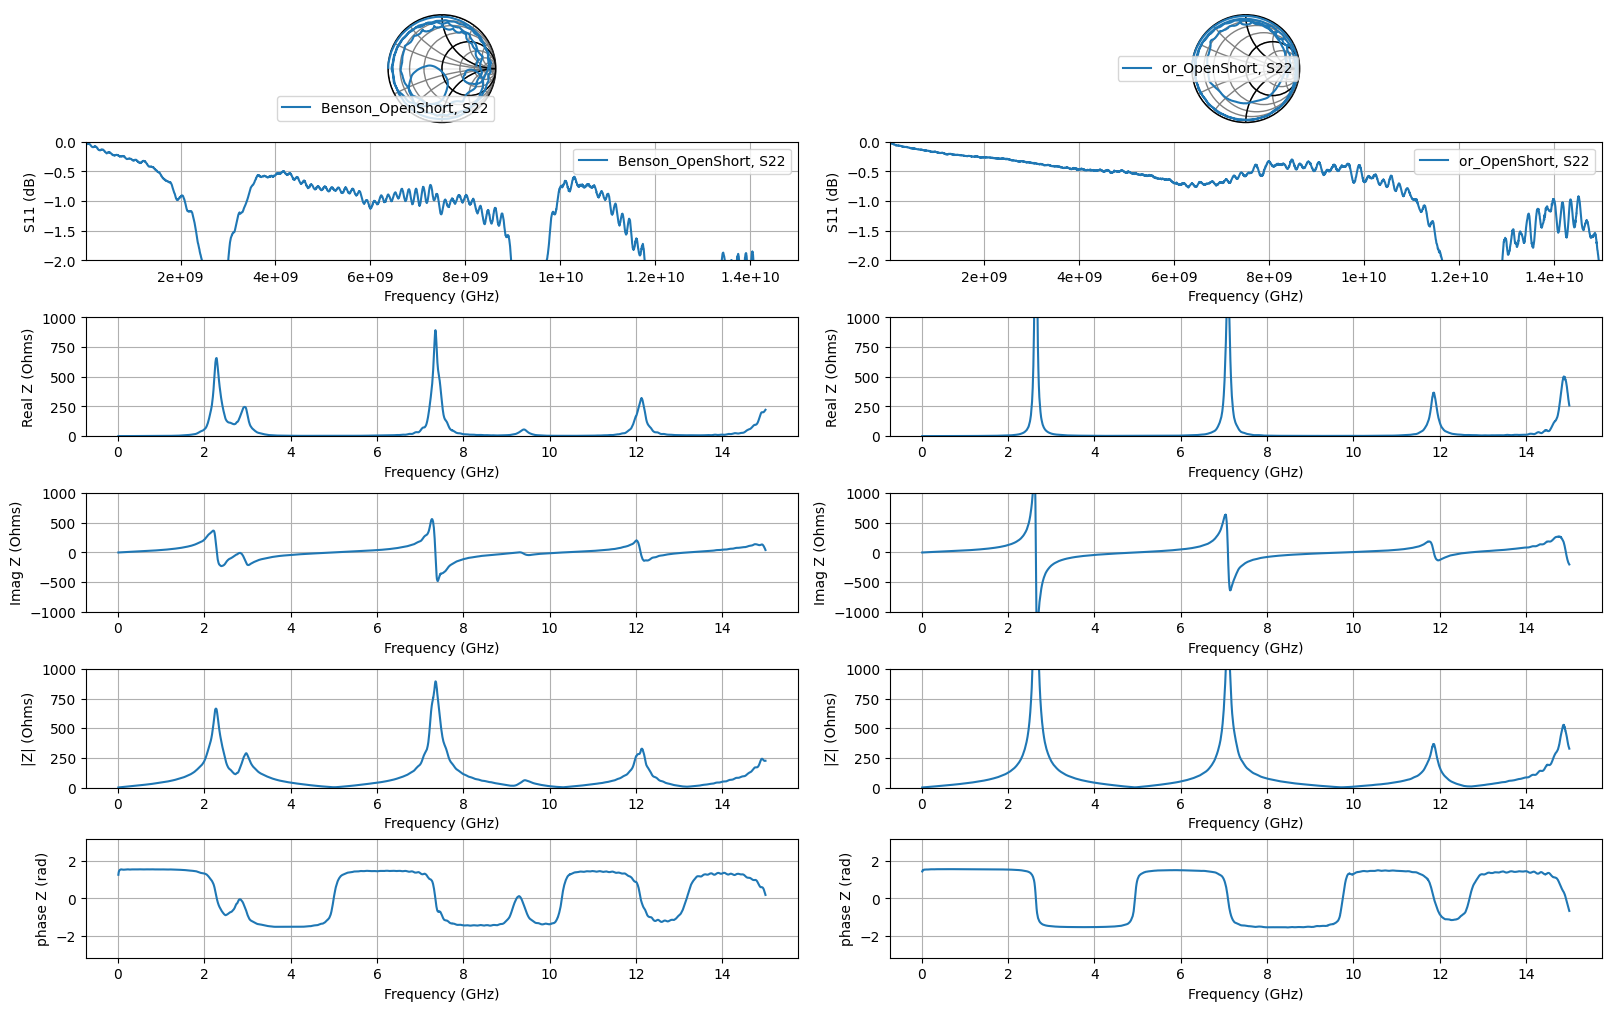

In [7]:
_, ax = pl.subplots(6,2,figsize=(16,10),layout='constrained')
# Loop through each subplot
for ind, i in enumerate([0, 1]):
    for j in range(1, 2):
        # Smith chart for S-parameters
        s2p[i].plot_s_smith(m=j, n=j, ax=ax[0, ind])
        # Magnitude reflection coefficient
        s2p[i].plot_s_db(m=j, n=j, ax=ax[1, ind])
        ax[1, ind].grid(True)
        ax[1, ind].set_ylim(-2, 0)
        ax[1, ind].set_ylabel('S11 (dB)')
        ax[1, ind].set_xlabel('Frequency (GHz)')

        # Real part of impedance
        ax[2, ind].plot(s2p[i].f/1e9, numpy.real(s2p[i].z[:, j, j]))
        ax[2, ind].grid(True)
        ax[2, ind].set_ylim(0, 1000)
        ax[2, ind].set_ylabel('Real Z (Ohms)')
        ax[2, ind].set_xlabel('Frequency (GHz)')

        # Imaginary part of impedance
        ax[3, ind].plot(s2p[i].f/1e9, numpy.imag(s2p[i].z[:, j, j]))
        ax[3, ind].grid(True)
        ax[3, ind].set_ylim(-1000, 1000)
        ax[3, ind].set_ylabel('Imag Z (Ohms)')
        ax[3, ind].set_xlabel('Frequency (GHz)')

        # Magnitude of impedance
        ax[4, ind].plot(s2p[i].f/1e9, abs(s2p[i].z[:, j, j]))
        ax[4, ind].grid(True)
        ax[4, ind].set_ylim(0, 1000)
        ax[4, ind].set_ylabel('|Z| (Ohms)')
        ax[4, ind].set_xlabel('Frequency (GHz)')

        # Phase of impedance
        ax[5, ind].plot(s2p[i].f/1e9, numpy.angle(s2p[i].z[:, j, j]))
        ax[5, ind].grid(True)
        ax[5, ind].set_ylim(-3.14, 3.14)
        ax[5, ind].set_ylabel('phase Z (rad)')
        ax[5, ind].set_xlabel('Frequency (GHz)')

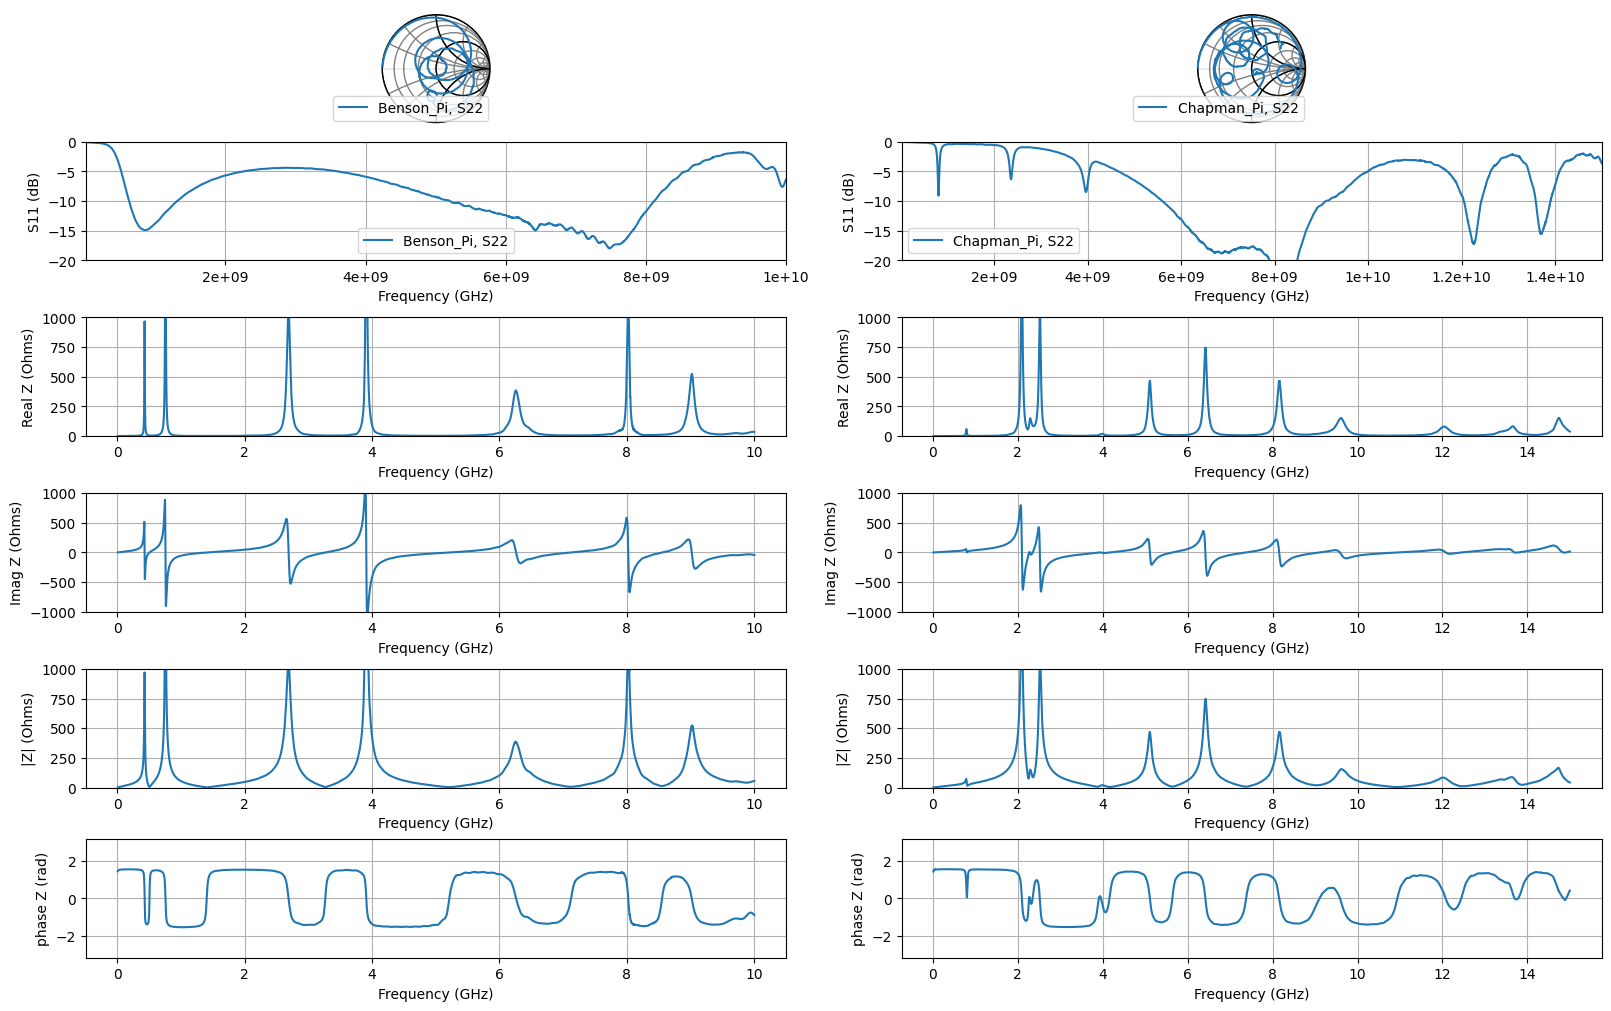

In [12]:
_, ax = pl.subplots(6,2,figsize=(16,10),layout='constrained')
# Loop through each subplot
for ind, i in enumerate([0, 1]):
    for j in range(1, 2):
        # Smith chart for S-parameters
        pinet[i].plot_s_smith(m=j, n=j, ax=ax[0, ind])
        # Magnitude reflection coefficient
        pinet[i].plot_s_db(m=j, n=j, ax=ax[1, ind])
        ax[1, ind].grid(True)
        ax[1, ind].set_ylim(-20, 0)
        ax[1, ind].set_ylabel('S11 (dB)')
        ax[1, ind].set_xlabel('Frequency (GHz)')

        # Real part of impedance
        ax[2, ind].plot(pinet[i].f/1e9, numpy.real(pinet[i].z[:, j, j]))
        ax[2, ind].grid(True)
        ax[2, ind].set_ylim(0, 1000)
        ax[2, ind].set_ylabel('Real Z (Ohms)')
        ax[2, ind].set_xlabel('Frequency (GHz)')

        # Imaginary part of impedance
        ax[3, ind].plot(pinet[i].f/1e9, numpy.imag(pinet[i].z[:, j, j]))
        ax[3, ind].grid(True)
        ax[3, ind].set_ylim(-1000, 1000)
        ax[3, ind].set_ylabel('Imag Z (Ohms)')
        ax[3, ind].set_xlabel('Frequency (GHz)')

        # Magnitude of impedance
        ax[4, ind].plot(pinet[i].f/1e9, abs(pinet[i].z[:, j, j]))
        ax[4, ind].grid(True)
        ax[4, ind].set_ylim(0, 1000)
        ax[4, ind].set_ylabel('|Z| (Ohms)')
        ax[4, ind].set_xlabel('Frequency (GHz)')

        # Phase of impedance
        ax[5, ind].plot(pinet[i].f/1e9, numpy.angle(pinet[i].z[:, j, j]))
        ax[5, ind].grid(True)
        ax[5, ind].set_ylim(-3.14, 3.14)
        ax[5, ind].set_ylabel('phase Z (rad)')
        ax[5, ind].set_xlabel('Frequency (GHz)')

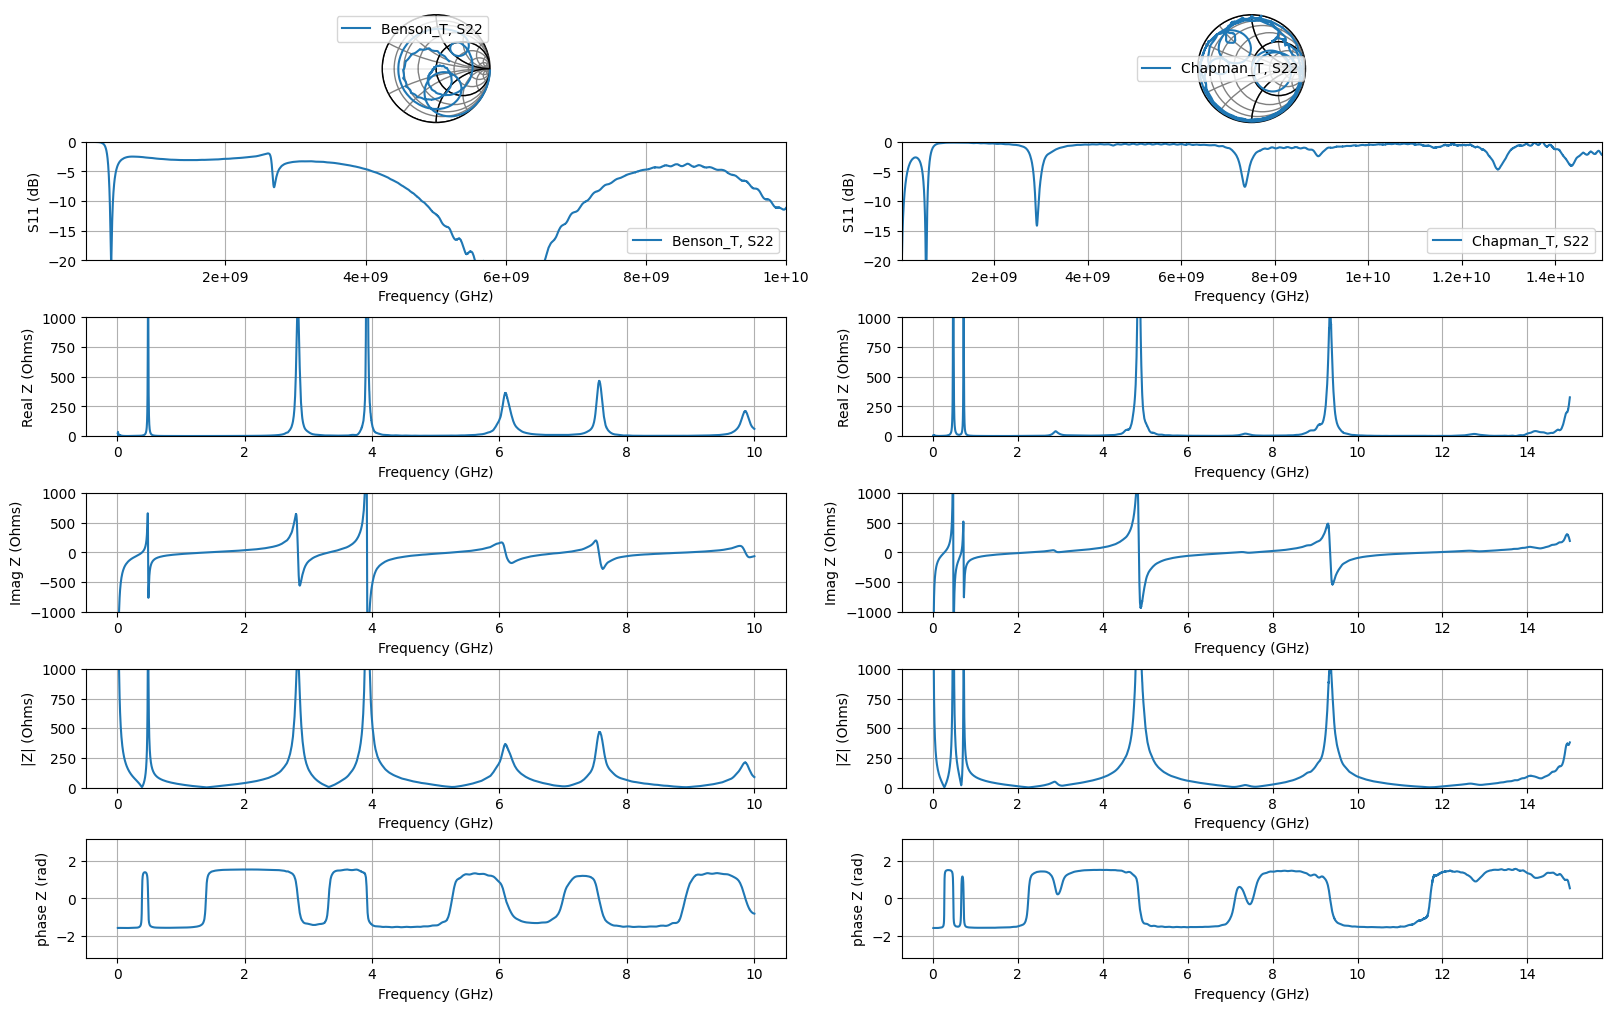

In [13]:
_, ax = pl.subplots(6,2,figsize=(16,10),layout='constrained')
# Loop through each subplot
for ind, i in enumerate([2,3]):
    for j in range(1, 2):
        # Smith chart for S-parameters
        pinet[i].plot_s_smith(m=j, n=j, ax=ax[0, ind])
        # Magnitude reflection coefficient
        pinet[i].plot_s_db(m=j, n=j, ax=ax[1, ind])
        ax[1, ind].grid(True)
        ax[1, ind].set_ylim(-20, 0)
        ax[1, ind].set_ylabel('S11 (dB)')
        ax[1, ind].set_xlabel('Frequency (GHz)')

        # Real part of impedance
        ax[2, ind].plot(pinet[i].f/1e9, numpy.real(pinet[i].z[:, j, j]))
        ax[2, ind].grid(True)
        ax[2, ind].set_ylim(0, 1000)
        ax[2, ind].set_ylabel('Real Z (Ohms)')
        ax[2, ind].set_xlabel('Frequency (GHz)')

        # Imaginary part of impedance
        ax[3, ind].plot(pinet[i].f/1e9, numpy.imag(pinet[i].z[:, j, j]))
        ax[3, ind].grid(True)
        ax[3, ind].set_ylim(-1000, 1000)
        ax[3, ind].set_ylabel('Imag Z (Ohms)')
        ax[3, ind].set_xlabel('Frequency (GHz)')

        # Magnitude of impedance
        ax[4, ind].plot(pinet[i].f/1e9, abs(pinet[i].z[:, j, j]))
        ax[4, ind].grid(True)
        ax[4, ind].set_ylim(0, 1000)
        ax[4, ind].set_ylabel('|Z| (Ohms)')
        ax[4, ind].set_xlabel('Frequency (GHz)')

        # Phase of impedance
        ax[5, ind].plot(pinet[i].f/1e9, numpy.angle(pinet[i].z[:, j, j]))
        ax[5, ind].grid(True)
        ax[5, ind].set_ylim(-3.14, 3.14)
        ax[5, ind].set_ylabel('phase Z (rad)')
        ax[5, ind].set_xlabel('Frequency (GHz)')